# C7.1
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2022-06-01

In [2]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [2]:
pixelsPerMetric = 0.1

## Load Image and preprocess

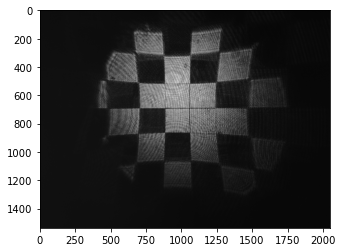

In [3]:
image = cv2.imread("Input/70_6.bmp", 1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert it to grayscale
plt.imshow(gray, cmap='gray')

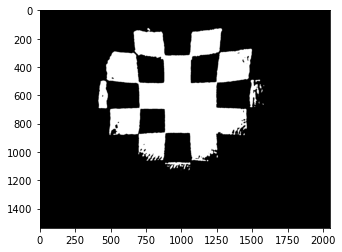

In [4]:
bilateral = cv2.bilateralFilter(gray,15,75,75)
thresh = cv2.GaussianBlur(bilateral,(3,3),0)
for i in range(10):
    thresh = cv2.GaussianBlur(thresh,(3,3),0)
    dilated = cv2.dilate(thresh, (1, 1), iterations=1)
ret, thresh = cv2.threshold(dilated, 50, 255, cv2.THRESH_BINARY) 
thresh = cv2.GaussianBlur(thresh,(3,3),0)

plt.imshow(thresh, cmap='gray')

## Find the corner

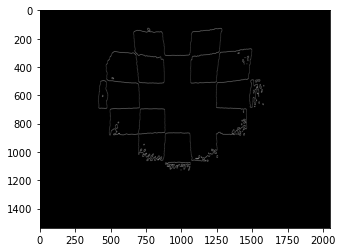

In [5]:
edge = cv2.Canny(thresh, 20, 200, 3)
edge = cv2.dilate(edge, (10, 10), iterations=1)
# edge = cv2.erode(edge, (200, 250), iterations=1)
plt.imshow(edge, cmap='gray')

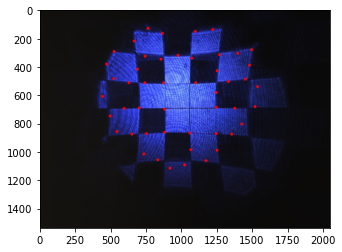

In [6]:
corners = cv2.goodFeaturesToTrack(edge, maxCorners = 200, qualityLevel = 0.01, minDistance = 100)
corners = np.int0(corners)
img = image.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), radius=10, color=(255, 0, 0), thickness=-1)
plt.imshow(img, cmap='gray')

In [7]:
for c in cnts:
    orig = image
    # Filter noise
    if cv2.contourArea(c) < 100:
        continue
        
    # Bounding box of the contour
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    box = perspective.order_points(box) # order the points in the contour 
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2) # Draw the outline

    # Loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

    # Compute and draw midpoints of each boundary
    def midpoint(ptA, ptB):
        return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
    
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)


    # Draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
        (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
        (255, 0, 255), 2)

    # Compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
#     if pixelsPerMetric is None:
#         pixelsPerMetric = dB / args["width"]

    # compute the size of the object
    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric

    # draw the object sizes on the image
    cv2.putText(orig, "{:.1f}in".format(dimA),
        (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}in".format(dimB),
        (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
        0.65, (255, 255, 255), 2)

# show the output image
cv2.imwrite("./Image.png", orig)

plt.imshow(orig)

NameError: name 'cnts' is not defined

## Convert to png


In [4]:
import cv2
import numpy as np

def save(path, image, jpg_quality=None, png_compression=None):
  '''
  persist :image: object to disk. if path is given, load() first.
  jpg_quality: for jpeg only. 0 - 100 (higher means better). Default is 95.
  png_compression: For png only. 0 - 9 (higher means a smaller size and longer compression time).
                  Default is 3.
  '''

  if jpg_quality:
    cv2.imwrite(path, image, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])
  elif png_compression:
    cv2.imwrite(path, image, [int(cv2.IMWRITE_PNG_COMPRESSION), png_compression])
  else:
    cv2.imwrite(path, image)

In [5]:
import os

for file in os.listdir("Input"):
    if file.endswith(".tif"):
        image = cv2.imread("Input/" + file)
        save("Output/" + os.path.splitext(file)[0]+".jpg", image, jpg_quality=50)